In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

In [4]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
X.shape

(70000, 784)

In [6]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')

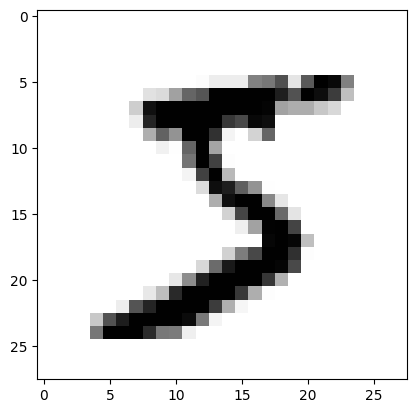

In [7]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[2]

'4'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

### Model training with `SGDClassifier`

In [11]:
sgd_clf = SGDClassifier(random_state=42)
# training
sgd_clf.fit(X_train, y_train_5)
# prediction
sgd_clf.predict([some_digit])

array([ True])

### Evaluating model's performance

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

Using Dummy Classifier

In [13]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train_5)
print(any(dummy.predict(X_train)))

False


In [14]:
cross_val_score(dummy, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.90958333, 0.90966667, 0.90966667, 0.90966667, 0.90966667])

In [15]:
y_train_pred = cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
y_pred = sgd_clf.predict(X_train)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_pred)

In [18]:
cm

array([[52316,  2263],
       [  601,  4820]])

### Precision Recall Tradeoff

In [19]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [20]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

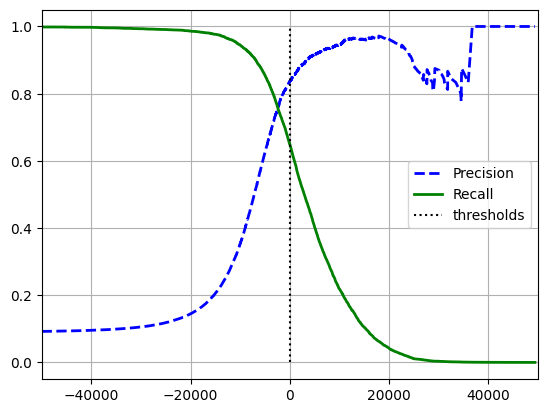

In [21]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(0, 0, 1.0, "k", "dotted", label="thresholds")
plt.xlim(-50000, 50000)
plt.legend()
plt.grid()
plt.show()

### Precision v/s Recall

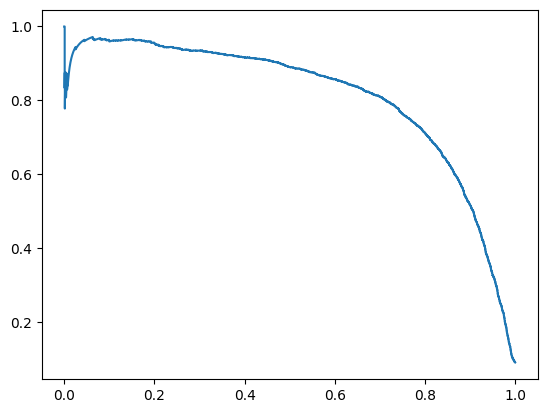

In [22]:
plt.plot(recalls, precisions, label="Precision/Recall Curve")
plt.show()

### ROC AUC

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

## **Error Analysis**

Before start error analysis, we are going to create and train a model(`sgd_clf`) of **SGDClassifier**.<br>
Than store the prediction values of this model to `y_train_pred` along with `cross_val_prediction`

In [24]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

Now predicting some values

In [25]:
y_train_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3)

Displaying the Cunfusion Matrix, before importing its utilities

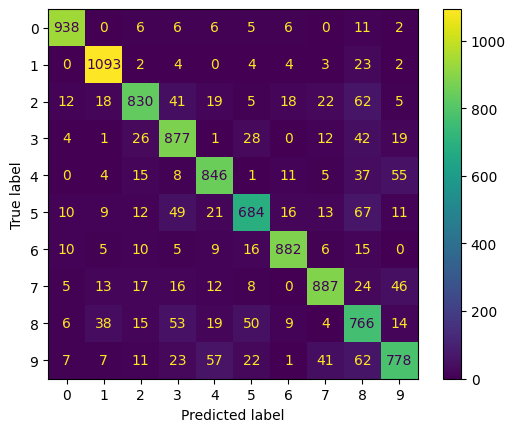

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_train_pred)
plt.show()

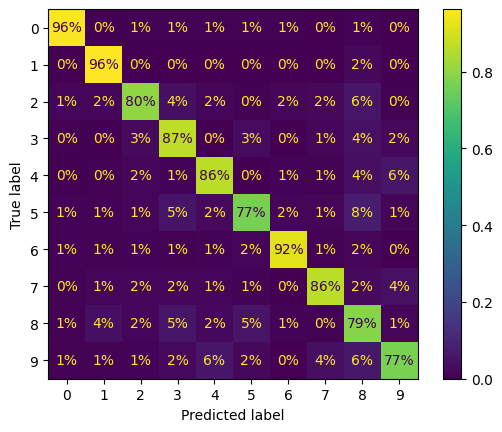

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_train_pred, normalize="true", values_format=".0%")
plt.show()

Another diagrams<br>
*Something went wrong with this code*

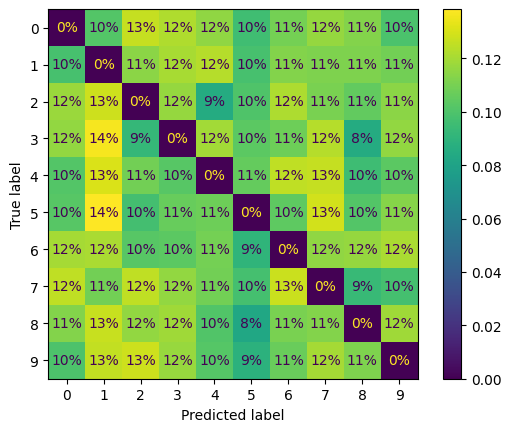

In [28]:
sample_weight = (y_train_pred != y_train[:10000])
ConfusionMatrixDisplay.from_predictions( y_train_pred,y_train[:10000],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()